### Define a class for OLS Linear Regression method

In [48]:
import numpy as np

In [257]:
class LinReg():

    def __init__(self) -> None:
        pass

    
    def add_bias(self,features_mat):
        l = features_mat.shape[0]
        bias = np.ones([l,1])
        features_mat_with_bias = np.hstack((bias,features_mat))
        #print('Shape after added bias:',features_mat_with_bias.shape)
        return features_mat_with_bias

    
    # return the resiaduals as a column
    def residuals(self,features,coefficients,output):

        #features = self.add_bias(features)
        
         
        #print('Features shape:',features.shape)

        #print('Coefficients shape:',coefficients.shape)
        
        h_i_mat = np.round(np.multiply(features,coefficients),4)

        #print('h_i_mat_shape', h_i_mat.shape)


        h_i = np.reshape(np.sum(h_i_mat,axis=1),[features.shape[0],])

        #print('Output Shape', output.shape)
        #print('H_i shape', h_i.shape)
        
        
        error_column = np.round(np.subtract(output,h_i),4)
        #print(error_column.shape)

        return error_column

        
    def sum_error_x_j(self,features,coefficients,output,j):

        features = self.add_bias(features_mat=features)

        errors = self.residuals(features,coefficients,output)

        error_square = np.round(pow(errors,2),4)
        
        error_x_j = np.round(np.multiply(error_square,features[:,j]),4)
        return np.round(np.sum(error_x_j))
    
    
    #define gradient descent algorithm
    def updateCoeffs(self,features, output,lr,iters):
        
        m = features.shape[1]
        n =  features.shape[0]
        
        #coeffs = np.zeros((1,m+1),dtype=np.float128)
        coeffs = np.random.random(size=(1, m+1))
        #print(coeffs)
        #print(type(coeffs))

        for iteration in range(iters):

            temp_coeffs = []

            for j in range(m+1):
                #print('j = ',j)

                coeffs_j = coeffs[0][j]
                #print('jth_coeff:', coeffs_j)

                temp_j = coeffs_j - np.round((lr/n)*self.sum_error_x_j(
                                    features,coeffs,output,j=j),4)

                temp_coeffs.append(temp_j)
            
            coeffs = np.reshape(np.array(temp_coeffs),[1,m+1])
            
            #print('Type of updated coeffs', type(coeffs))
            #print('updated coeffs', coeffs)

        return coeffs    


    # define a function to train the model

    def train_the_model(self,X_train, y_train, learning_rate = 0.01, iterations = 100, show = False):

        #first convert them into numpy ndarrays

        X_train = X_train.to_numpy(dtype=np.float128)
        y_train = y_train.to_numpy(dtype=np.float128)

        optimal_coeffs = self.updateCoeffs(X_train,y_train,learning_rate,iterations)

        # create an instance variable to pass it to the test function
        self.optimal_coeffs = optimal_coeffs

        if show:
            print(f'Intercept: \n{optimal_coeffs[0][0]}')
            print(f'Coefficients: \n{optimal_coeffs[0][1:]}')
    
    # Define a function to test the model
    def test_the_model(self,X_test):
        X_test = X_test.to_numpy(dtype=np.float128)

        #predict using the obtained coefficients
        X_test = self.add_bias(X_test)

        prediction_mat = np.multiply(X_test,self.optimal_coeffs)
        predictions = np.sum(prediction_mat,axis = 1)
        return predictions


### Now use the class to apply linear regression

In [216]:
#import the library 
import pandas as pd

#import the dataset
df = pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39.343
1,1.3,46.205
2,1.5,37.731
3,2.0,43.525
4,2.2,39.891


In [223]:
#Extract features and output
X = df.iloc[:,1:len(df.columns)]

y = df.iloc[:,-1]

#Scale the X data
from sklearn.preprocessing import minmax_scale

# Apply min-max scaling to the data
#y = pd.DataFrame(minmax_scale(y))

In [224]:
# Split into train test
from sklearn.model_selection import train_test_split

X_train,  X_test,y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)
print(X_train.shape,y_train.shape,X_test.shape, y_test.shape)

(20, 1) (20,) (10, 1) (10,)


### Now apply Linear Regression

In [264]:
# call the class to define a model
linearRegression = LinReg()

#train the model
linearRegression.train_the_model(X_train,y_train,
                                learning_rate=0.01,
                                iterations=10,
                                show=True)


Intercept: 
-inf
Coefficients: 
[-3.97196247e+3775]


In [265]:
predicted = linearRegression.test_the_model(X_test=X_test)

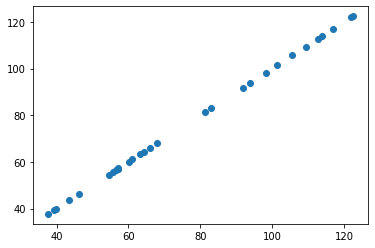

In [268]:
import matplotlib.pyplot as plt

plt.scatter(X,y)
plt.plot(predicted,y_test)
plt.show()